当前数据集上的最佳模型超参数设置，
{'activation': 'tanh', 'hidden_layer_sizes': (5, 2), 'learning_rate_init': 0.1, 'max_iter': 300}
相应评分:
17.183


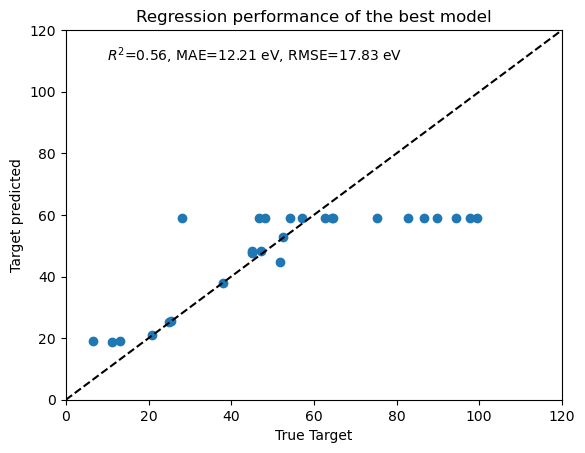

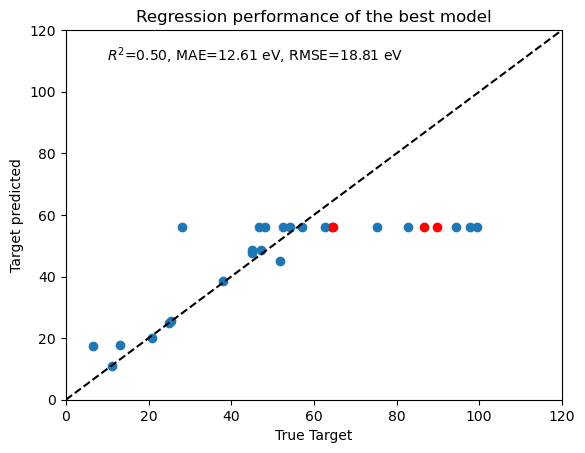

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve,ShuffleSplit
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import math
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#读取数据表格
data = pd.read_csv(r"C:\Users\26477\Desktop\boston\2023\8\data.csv",
                    encoding='gbk')

#print(data)
#输入特征x
X = data.iloc[:,1:]
X = X.to_numpy()
Y = data.iloc[:,0]
Y = Y.to_numpy()

#标准化
X = StandardScaler().fit_transform(X)

#main
model = MLPRegressor() #MLP=ANN

tuned_parameters = [
    {'hidden_layer_sizes':[(5,),(5,2),(5,5,2)]
      ,"activation":['relu','logistic','tanh','identity']
      ,'learning_rate_init':[0.001,0.01,0.1]
      ,"max_iter":[200,300,400]
    },]
clf = GridSearchCV(model,tuned_parameters,
                   scoring='neg_mean_absolute_error',cv=5)

clf.fit(X,Y)

#输出结果
print('当前数据集上的最佳模型超参数设置，')
print(clf.best_params_)
print('相应评分:')
print('%0.3f'%(-clf.best_score_))

'''
print()
print('超参数设置及相应模型（评分/±标准差）：')
means = -clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean,std,params in zip(means,stds,clf.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean,std * 2,params))
'''
#绘图
# 获取最优模型
best_model = clf.best_estimator_
'''
parameters = {'':,}
model = MLPRegressor(**params,
                    random_state=1412)
'''

#预测
Y_predict = best_model.predict(X)
#绘制
fig,ax =  plt.subplots()
#绘制预测-真值对散点
ax.scatter(Y,Y_predict) 
#绘制对角线
ax.plot([0,120],[0,120],'--k')
ax.set_ylabel('Target predicted')
ax.set_xlabel('True Target')
ax.set_title('Regression performance of the best model')

#计算决定系数R2，MAE以及RMSE作为图注
ax.text(
    10,
    110,
    r'$R^2$=%.2f, MAE=%.2f eV, RMSE=%.2f eV'
    %(r2_score(Y,Y_predict),mean_absolute_error(Y,Y_predict),
      math.sqrt(mean_squared_error(Y,Y_predict))),
)
#x y 轴上下限
ax.set_xlim([0,120])
ax.set_ylim([0,120])

#基于最优参数再单独训练一个新模型，进行一次留一验证，测试集比例0.1
from sklearn.model_selection import train_test_split
#分配训练集，验证集
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)
#基于最优参数训练新模型
model = MLPRegressor(**clf.best_params_)
model.fit(X_train,Y_train)

#分别预测
Y_pred = model.predict(X)
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

#绘制
fig, ax = plt.subplots()
#绘制预测——真值对散点
#训练集数据点
ax.scatter(Y_train,Y_train_pred)
#测试集数据点（red）
ax.scatter(Y_test,Y_test_pred, color = 'r')
#绘制对角线
ax.plot([0,120],[0,120],'--k')
ax.set_ylabel('Target predicted')
ax.set_xlabel('True Target')
ax.set_title('Regression performance of the best model')

#计算决定系数R2，MAE以及RMSE作为图注
ax.text(
    10,
    110,
    r'$R^2$=%.2f, MAE=%.2f eV, RMSE=%.2f eV'
    
    %(r2_score(Y,Y_pred),mean_absolute_error(Y,Y_pred),
      math.sqrt(mean_squared_error(Y,Y_pred))),
)
#x y 轴上下限
ax.set_xlim([0,120])
ax.set_ylim([0,120])

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


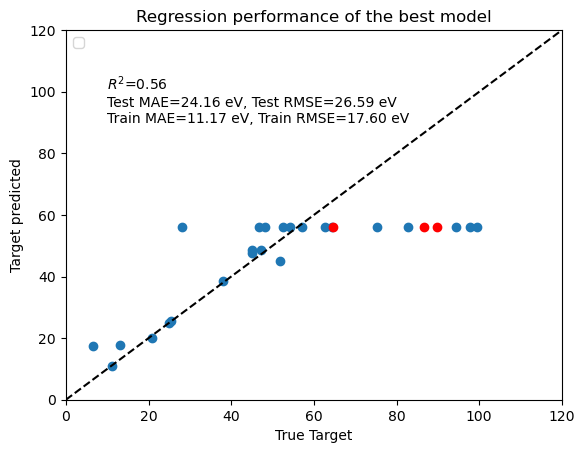

In [3]:
#绘制
fig, ax = plt.subplots()
#绘制预测——真值对散点
#训练集数据点
ax.scatter(Y_train,Y_train_pred)
#测试集数据点（red）
ax.scatter(Y_test,Y_test_pred, color = 'r')
#绘制对角线
ax.plot([0,120],[0,120],'--k')
ax.set_ylabel('Target predicted')
ax.set_xlabel('True Target')
ax.set_title('Regression performance of the best model')


train_mae = mean_absolute_error(Y_train, Y_train_pred)
test_mae = mean_absolute_error(Y_test, Y_test_pred)

# 计算决定系数R2，MAE以及RMSE作为图注
ax.text(
    10,
    90,
    r'$R^2$=%.2f' % r2_score(Y, Y_predict) +
    '\nTest MAE=%.2f eV, Test RMSE=%.2f eV' % (mean_absolute_error(Y_test, Y_test_pred), math.sqrt(mean_squared_error(Y_test, Y_test_pred))) +
    '\nTrain MAE=%.2f eV, Train RMSE=%.2f eV' % (mean_absolute_error(Y_train, Y_train_pred), math.sqrt(mean_squared_error(Y_train, Y_train_pred))),
)

#x y 轴上下限
ax.set_xlim([0,120])
ax.set_ylim([0,120])

plt.legend()

plt.show()

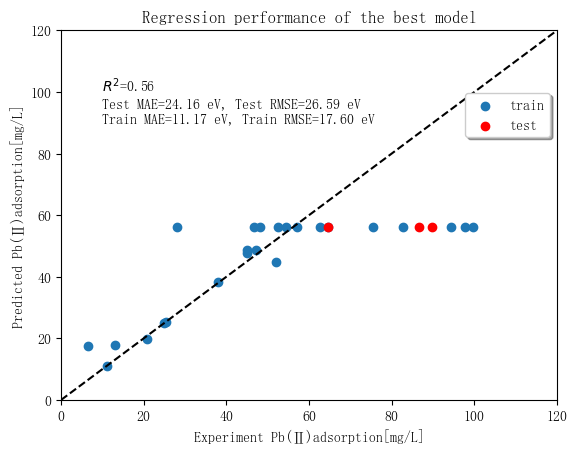

In [6]:

#绘制
fig, ax = plt.subplots()
#绘制预测——真值对散点
#训练集数据点
ax.scatter(Y_train,Y_train_pred)
#测试集数据点（red）
ax.scatter(Y_test,Y_test_pred, color = 'r')

#绘制对角线
ax.plot([0,120],[0,120],'--k')
ax.set_ylabel('Predicted Pb(Ⅱ)adsorption[mg/L]')
ax.set_xlabel('Experiment Pb(Ⅱ)adsorption[mg/L]')
ax.set_title('Regression performance of the best model')

train_mae = mean_absolute_error(Y_train, Y_train_pred)
test_mae = mean_absolute_error(Y_test, Y_test_pred)

# 计算决定系数R2，MAE以及RMSE作为图注
ax.text(
    10,
    90,
    r'$R^2$=%.2f' % r2_score(Y, Y_predict) +
    '\nTest MAE=%.2f eV, Test RMSE=%.2f eV' % (mean_absolute_error(Y_test, Y_test_pred), math.sqrt(mean_squared_error(Y_test, Y_test_pred))) +
    '\nTrain MAE=%.2f eV, Train RMSE=%.2f eV' % (mean_absolute_error(Y_train, Y_train_pred), math.sqrt(mean_squared_error(Y_train, Y_train_pred))),
)

#x y 轴上下限
ax.set_xlim([0,120])
ax.set_ylim([0,120])

ax.legend( ('train', 'test'), 
          loc='upper right', shadow=True,bbox_to_anchor=(1, 0.85))
plt.show()